# Getting started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./dataset/mushrooms.csv")

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing

In [5]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [6]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [7]:
y = data['class']
X = data[['cap-shape', 'cap-surface']]

In [8]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X)

      cap-shape  cap-surface
0      1.029712     0.140128
1      1.029712     0.140128
2     -2.087047     0.140128
3      1.029712     0.953270
4      1.029712     0.140128
...         ...          ...
8119  -0.216992     0.140128
8120   1.029712     0.140128
8121  -0.840343     0.140128
8122  -0.216992     0.953270
8123   1.029712     0.140128

[8124 rows x 2 columns]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Training Process

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, random_state=2)
dt.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, random_state=2)

In [11]:
#Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [12]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

# Training

In [13]:
np.sum(y) / len(y)

0.48202855736090594

In [14]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [15]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)

In [16]:
print(f"Logistic Regression : {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test, y_test)}")
print(f"Neural Network : {nn_model.score(X_test, y_test)}")
print("Metrics Acc : {:.2f}".format(acc))

Logistic Regression : 0.5538461538461539
Support Vector Machine : 0.6338461538461538
Neural Network : 0.6326153846153846
Metrics Acc : 0.63


<AxesSubplot:>

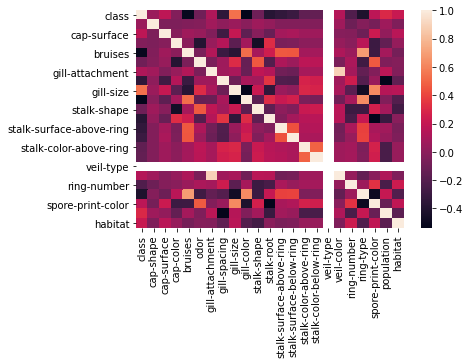

In [17]:
X_test.shape

corr = data.corr()

sns.heatmap(corr)

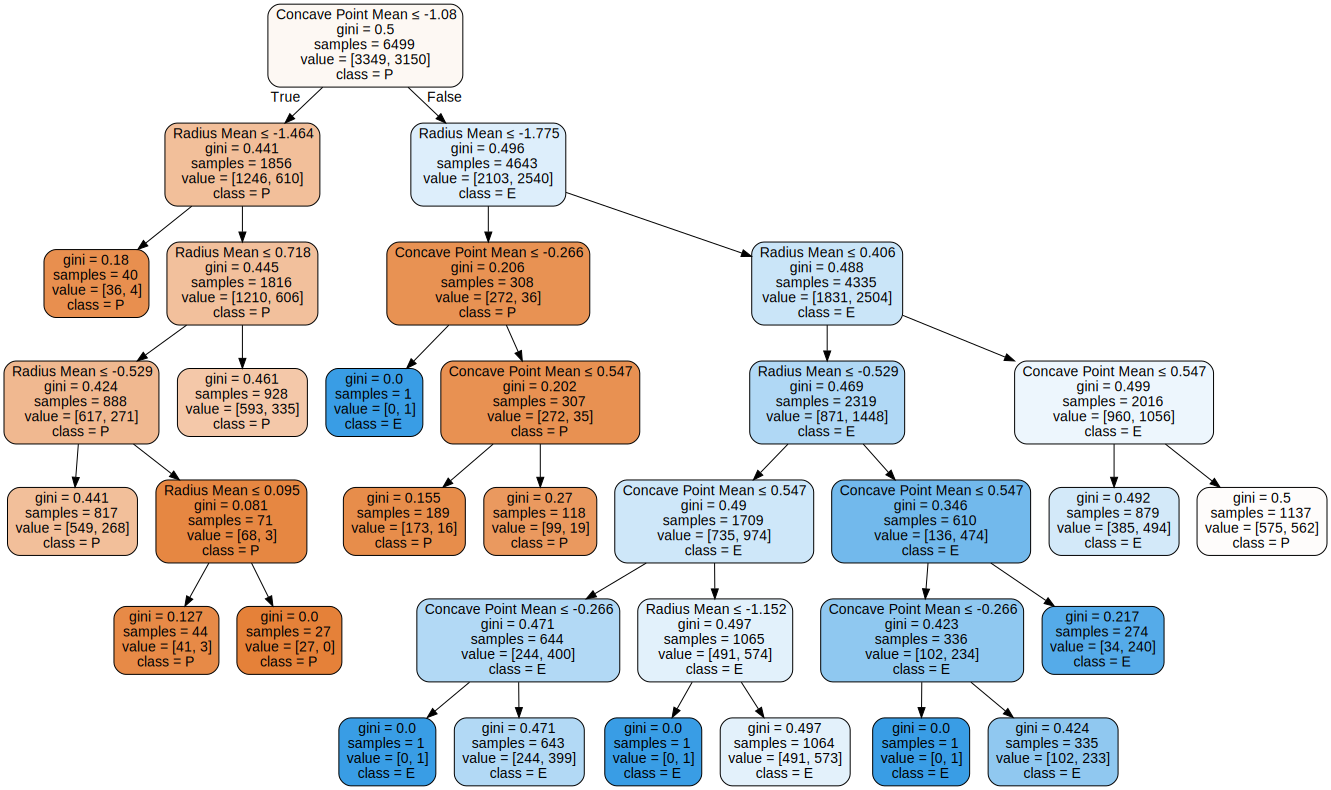

In [19]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    dt.fit(X_train, y_train), 
    out_file=None,
    feature_names=['Radius Mean', 'Concave Point Mean'],
    class_names=['P', 'E'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(dot_data)
graph